In [33]:
!pip --disable-pip-version-check --quiet install pillow matplotlib

In [34]:
import io
from urllib.request import urlopen, Request
from urllib.parse import urlparse
from PIL import Image
from PIL.Image import Image as PilImage

def url_to_pil(url:str) -> PilImage:
    headers = { 'User-Agent': 'Mozilla/6.0'}
    data = urlopen(Request(url, headers=headers)).read()
    bts = io.BytesIO(data)
    im = Image.open(bts)
    im.filename = urlparse(url).path
    return im


In [35]:
urls = [
    "https://images.wehkamp.nl/i/wehkamp/16420094_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16454613_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16454613_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16179041_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16392908_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16430906_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16433387_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16439873_eb_02",
    "https://images.wehkamp.nl/i/wehkamp/16353572_eb_04",
    "https://images.wehkamp.nl/i/wehkamp/16441968_eb_04",
    "https://images.wehkamp.nl/i/wehkamp/16443748_eb_03"]

images = [url_to_pil(u) for u in urls]

In [36]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os

def display_images(
    images: [PilImage], 
    columns=5, width=20, height=8, max_images=15, 
    label_wrap_length=50, label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):

        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)

        if hasattr(image, 'filename'):
            title=image.filename
            if title.endswith("/"): title = title[0:-1]
            title=os.path.basename(title)
            title=textwrap.wrap(title, label_wrap_length)
            title="\n".join(title)
            plt.title(title, fontsize=label_font_size); 

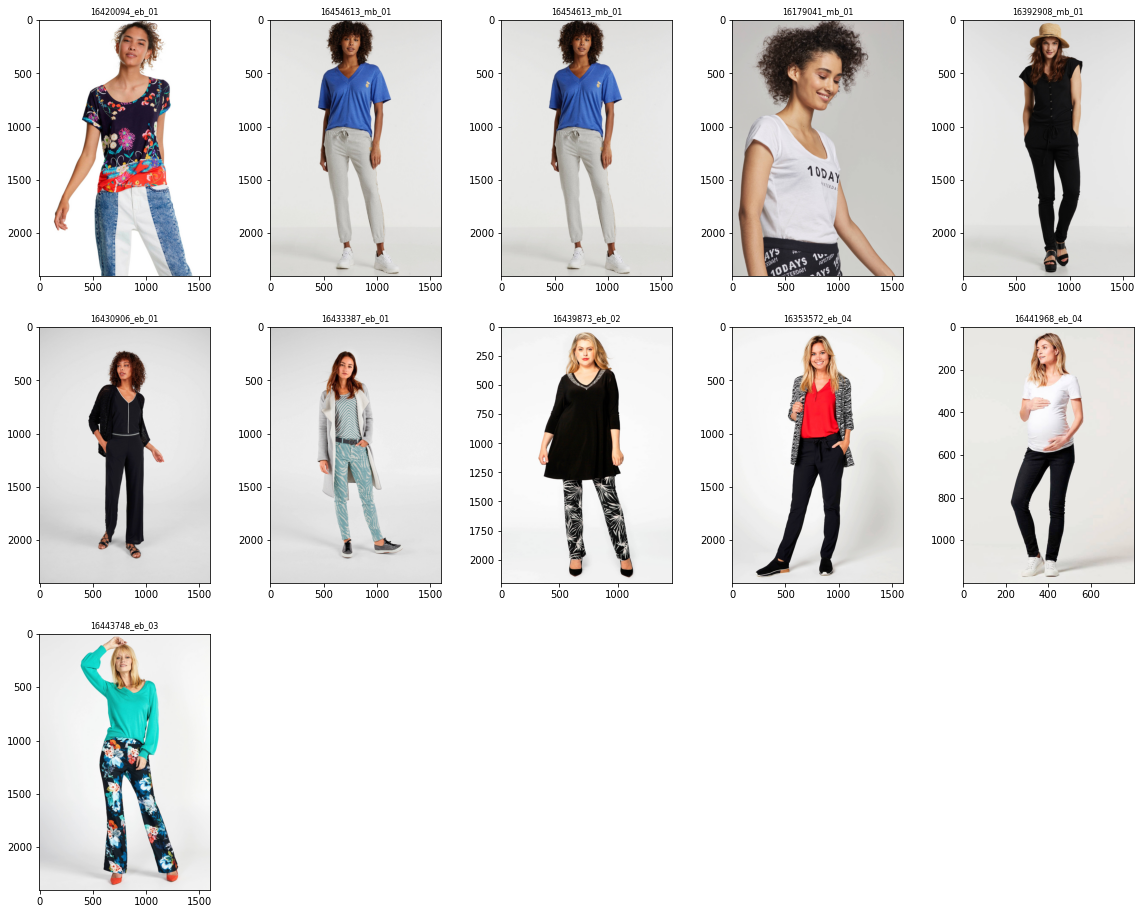

In [37]:
display_images(images)


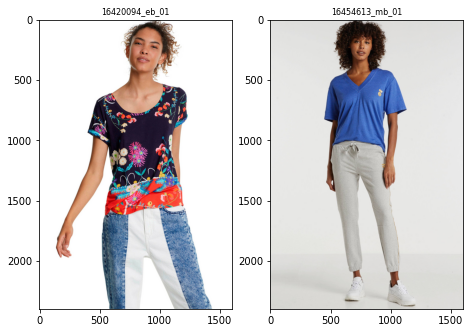

In [39]:
# check if 2 images work:

two_urls = [
    "https://images.wehkamp.nl/i/wehkamp/16420094_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16454613_mb_01",
]
two_images = [url_to_pil(u) for u in two_urls]

display_images(two_images)